<a href="https://colab.research.google.com/github/aman-6/Data-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.core.numerictypes import ScalarType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from ydata_profiling import ProfileReport

In [4]:
dataset=pd.read_csv('Heart Data.csv')
prof=ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
ab=pd.read_csv('Heart Data.csv')
ab

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [6]:
ab.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [7]:
ab.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
ab.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot: xlabel='HeartDiseaseorAttack', ylabel='count'>

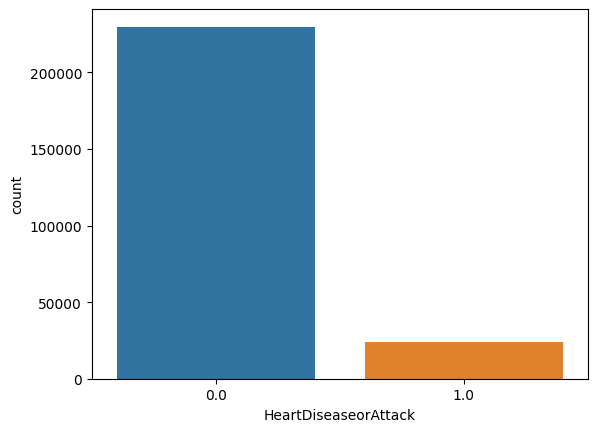

In [9]:
sns.countplot(data=ab, x='HeartDiseaseorAttack')

<AxesSubplot: xlabel='Smoker', ylabel='count'>

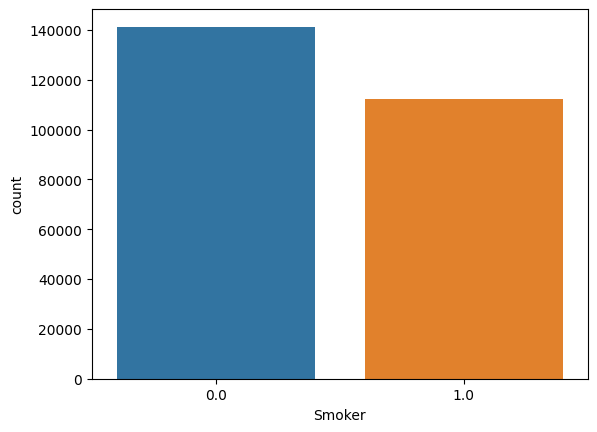

In [10]:
sns.countplot(data=ab, x='Smoker')

In [11]:
ab.corr()

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   
NoDocbcCost                       0.031000  0.017358  0.013310  -0.058255   
GenHlth                           0.258383  0.300530  0.208426   0.046589   
MentHlth                          0.064621  0.056456  0.062069  -0.008366   
PhysHlth                          0.181698  0.161212  0.121751   0.031775   
DiffWalk                          0.212709  0.223618  0.144672   0.040585   
Sex                               0.086096  0.052207  0.031205  -0.022115   
Age                               0.221618  0.344452  0.272318   0.090321   
Education                        -0.099600 -0.141358 -0.070802   0.001510   
Income                           -0.141011 -0.171235 -0.085459   0.014259   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272     -0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596     -0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085     -0.078046   
CholCheck             0.034495 -0.009929  0.024158  0.067546      0.004190   
BMI                   1.000000  0.013804  0.020153  0.224379     -0.147294   
Smoker                0.013804  1.000000  0.061173  0.062914     -0.087401   
Stroke                0.020153  0.061173  1.000000  0.107179     -0.069151   
Diabetes              0.224379  0.062914  0.107179  1.000000     -0.121947   
PhysActivity         -0.147294 -0.087401 -0.069151 -0.121947      1.000000   
Fruits               -0.087518 -0.077666 -0.013389 -0.042192      0.142756   
Veggies              -0.062275 -0.030678 -0.041124 -0.058972      0.153150   
HvyAlcoholConsump    -0.048736  0.101619 -0.016950 -0.057882      0.012392   
AnyHealthcare        -0.018471 -0.023251  0.008776  0.015410      0.035505   
NoDocbcCost           0.058206  0.048946  0.034804  0.035436     -0.061638   
GenHlth               0.239185  0.163143  0.177942  0.302587     -0.266186   
MentHlth              0.085310  0.092196  0.070172  0.073507     -0.125587   
PhysHlth              0.121141  0.116460  0.148944  0.176287     -0.219230   
DiffWalk              0.197078  0.122463  0.176567  0.224239     -0.253174   
Sex                   0.042950  0.093662  0.002978  0.031040      0.032482   
Age                  -0.036618  0.120641  0.126974  0.185026     -0.092511   
Education            -0.103932 -0.161955 -0.076009 -0.130517      0.199658   
Income               -0.100069 -0.123937 -0.128599 -0.171483      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack -0.019790  ...       0.018734     0.031000  0.258383   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -0.058255  0.046589   
BMI                  -0.087518  ...      -0.018471     0.058206  0.239

In [12]:
round(ab.corr(),3)

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack                 1.000   0.209     0.181      0.044   
HighBP                               0.209   1.000     0.298      0.099   
HighChol                             0.181   0.298     1.000      0.086   
CholCheck                            0.044   0.099     0.086      1.000   
BMI                                  0.053   0.214     0.107      0.034   
Smoker                               0.114   0.097     0.091     -0.010   
Stroke                               0.203   0.130     0.093      0.024   
Diabetes                             0.180   0.272     0.209      0.068   
PhysActivity                        -0.087  -0.125    -0.078      0.004   
Fruits                              -0.020  -0.041    -0.041      0.024   
Veggies                             -0.039  -0.061    -0.040      0.006   
HvyAlcoholConsump                   -0.029  -0.004    -0.012     -0.024   
AnyHealthcare                        0.019   0.038     0.042      0.118   
NoDocbcCost                          0.031   0.017     0.013     -0.058   
GenHlth                              0.258   0.301     0.208      0.047   
MentHlth                             0.065   0.056     0.062     -0.008   
PhysHlth                             0.182   0.161     0.122      0.032   
DiffWalk                             0.213   0.224     0.145      0.041   
Sex                                  0.086   0.052     0.031     -0.022   
Age                                  0.222   0.344     0.272      0.090   
Education                           -0.100  -0.141    -0.071      0.002   
Income                              -0.141  -0.171    -0.085      0.014   

                        BMI  Smoker  Stroke  Diabetes  PhysActivity  Fruits  \
HeartDiseaseorAttack  0.053   0.114   0.203     0.180        -0.087  -0.020   
HighBP                0.214   0.097   0.130     0.272        -0.125  -0.041   
HighChol              0.107   0.091   0.093     0.209        -0.078  -0.041   
CholCheck             0.034  -0.010   0.024     0.068         0.004   0.024   
BMI                   1.000   0.014   0.020     0.224        -0.147  -0.088   
Smoker                0.014   1.000   0.061     0.063        -0.087  -0.078   
Stroke                0.020   0.061   1.000     0.107        -0.069  -0.013   
Diabetes              0.224   0.063   0.107     1.000        -0.122  -0.042   
PhysActivity         -0.147  -0.087  -0.069    -0.122         1.000   0.143   
Fruits               -0.088  -0.078  -0.013    -0.042         0.143   1.000   
Veggies              -0.062  -0.031  -0.041    -0.059         0.153   0.254   
HvyAlcoholConsump    -0.049   0.102  -0.017    -0.058         0.012  -0.035   
AnyHealthcare        -0.018  -0.023   0.009     0.015         0.036   0.032   
NoDocbcCost           0.058   0.049   0.035     0.035        -0.062  -0.044   
GenHlth               0.239   0.163   0.178     0.303        -0.266  -0.104   
MentHlth              0.085   0.092   0.070     0.074        -0.126  -0.068   
PhysHlth              0.121   0.116   0.149     0.176        -0.219  -0.045   
DiffWalk              0.197   0.122   0.177     0.224        -0.253  -0.048   
Sex                   0.043   0.094   0.003     0.031         0.032  -0.091   
Age                  -0.037   0.121   0.127     0.185        -0.093   0.065   
Education            -0.104  -0.162  -0.076    -0.131         0.200   0.110   
Income               -0.100  -0.124  -0.129    -0.171         0.199   0.080   

                      ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
HeartDiseaseorAttack  ...          0.019        0.031    0.258     0.065   
HighBP                ...          0.038        0.017    0.301     0.056   
HighChol              ...          0.042        0.013    0.208     0.062   
CholCheck             ...          0.118       -0.058    0.047    -0.008   
BMI                   ...         -0.018        0.058    0.239     0.085   
Smoker                

<AxesSubplot: >

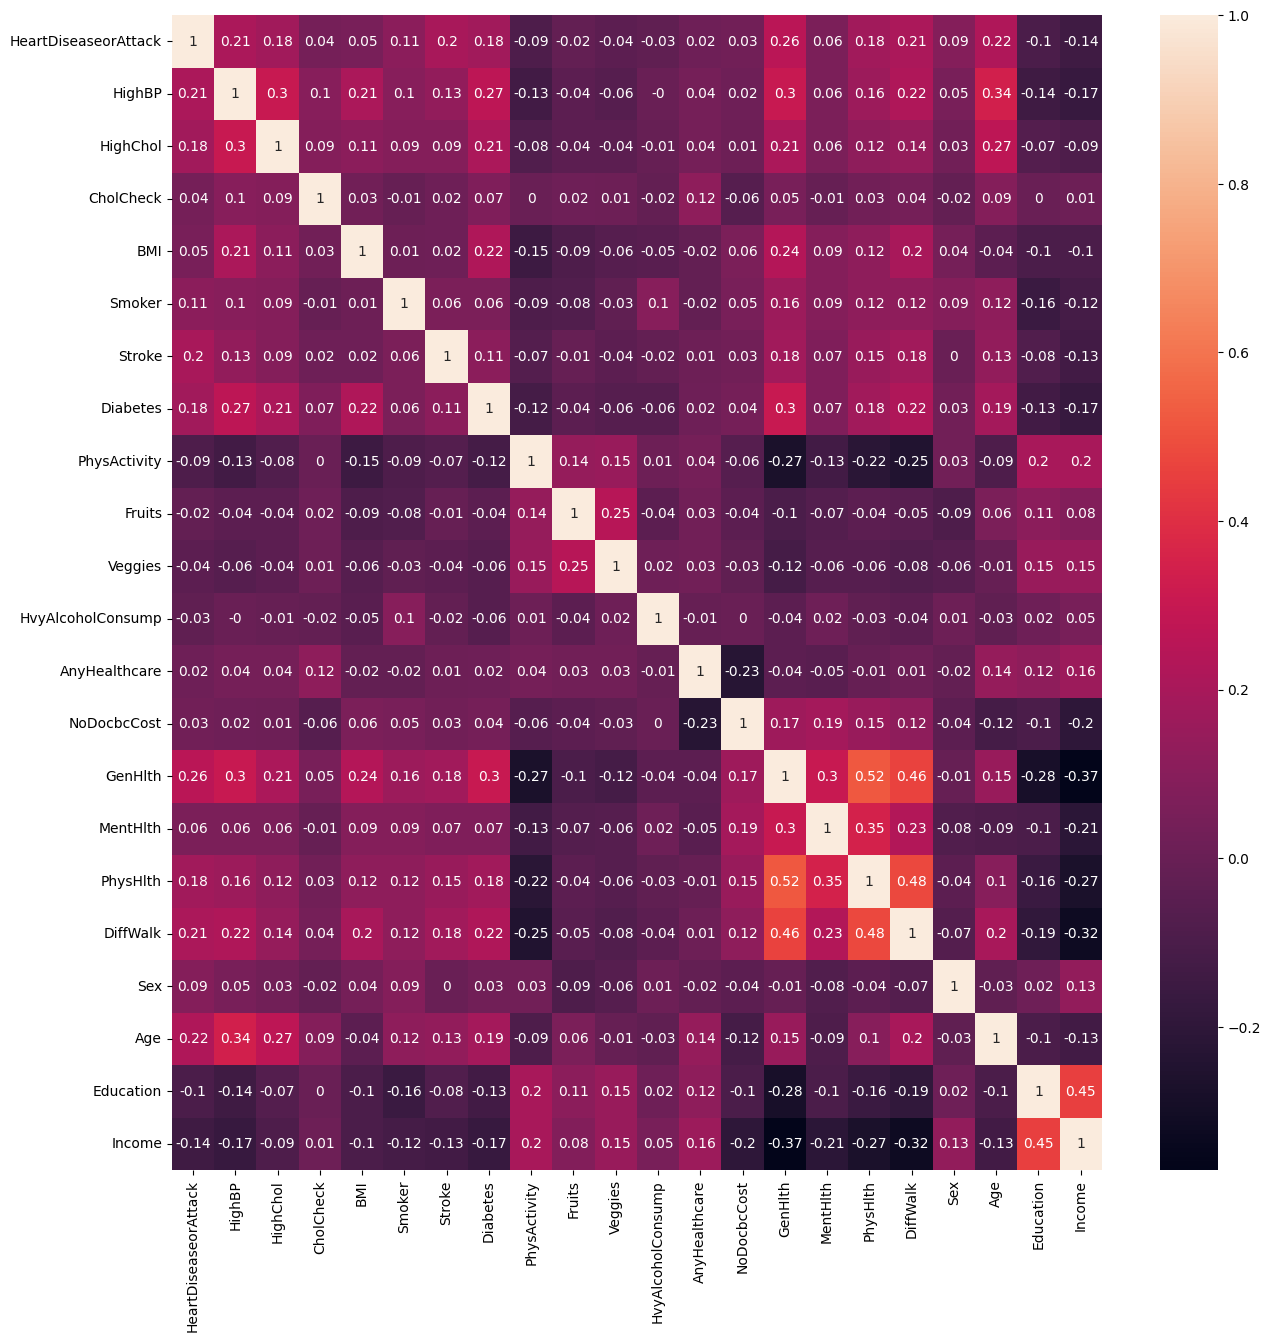

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(ab.corr(),2), annot=True)

In [27]:
ab.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [31]:
catcol = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

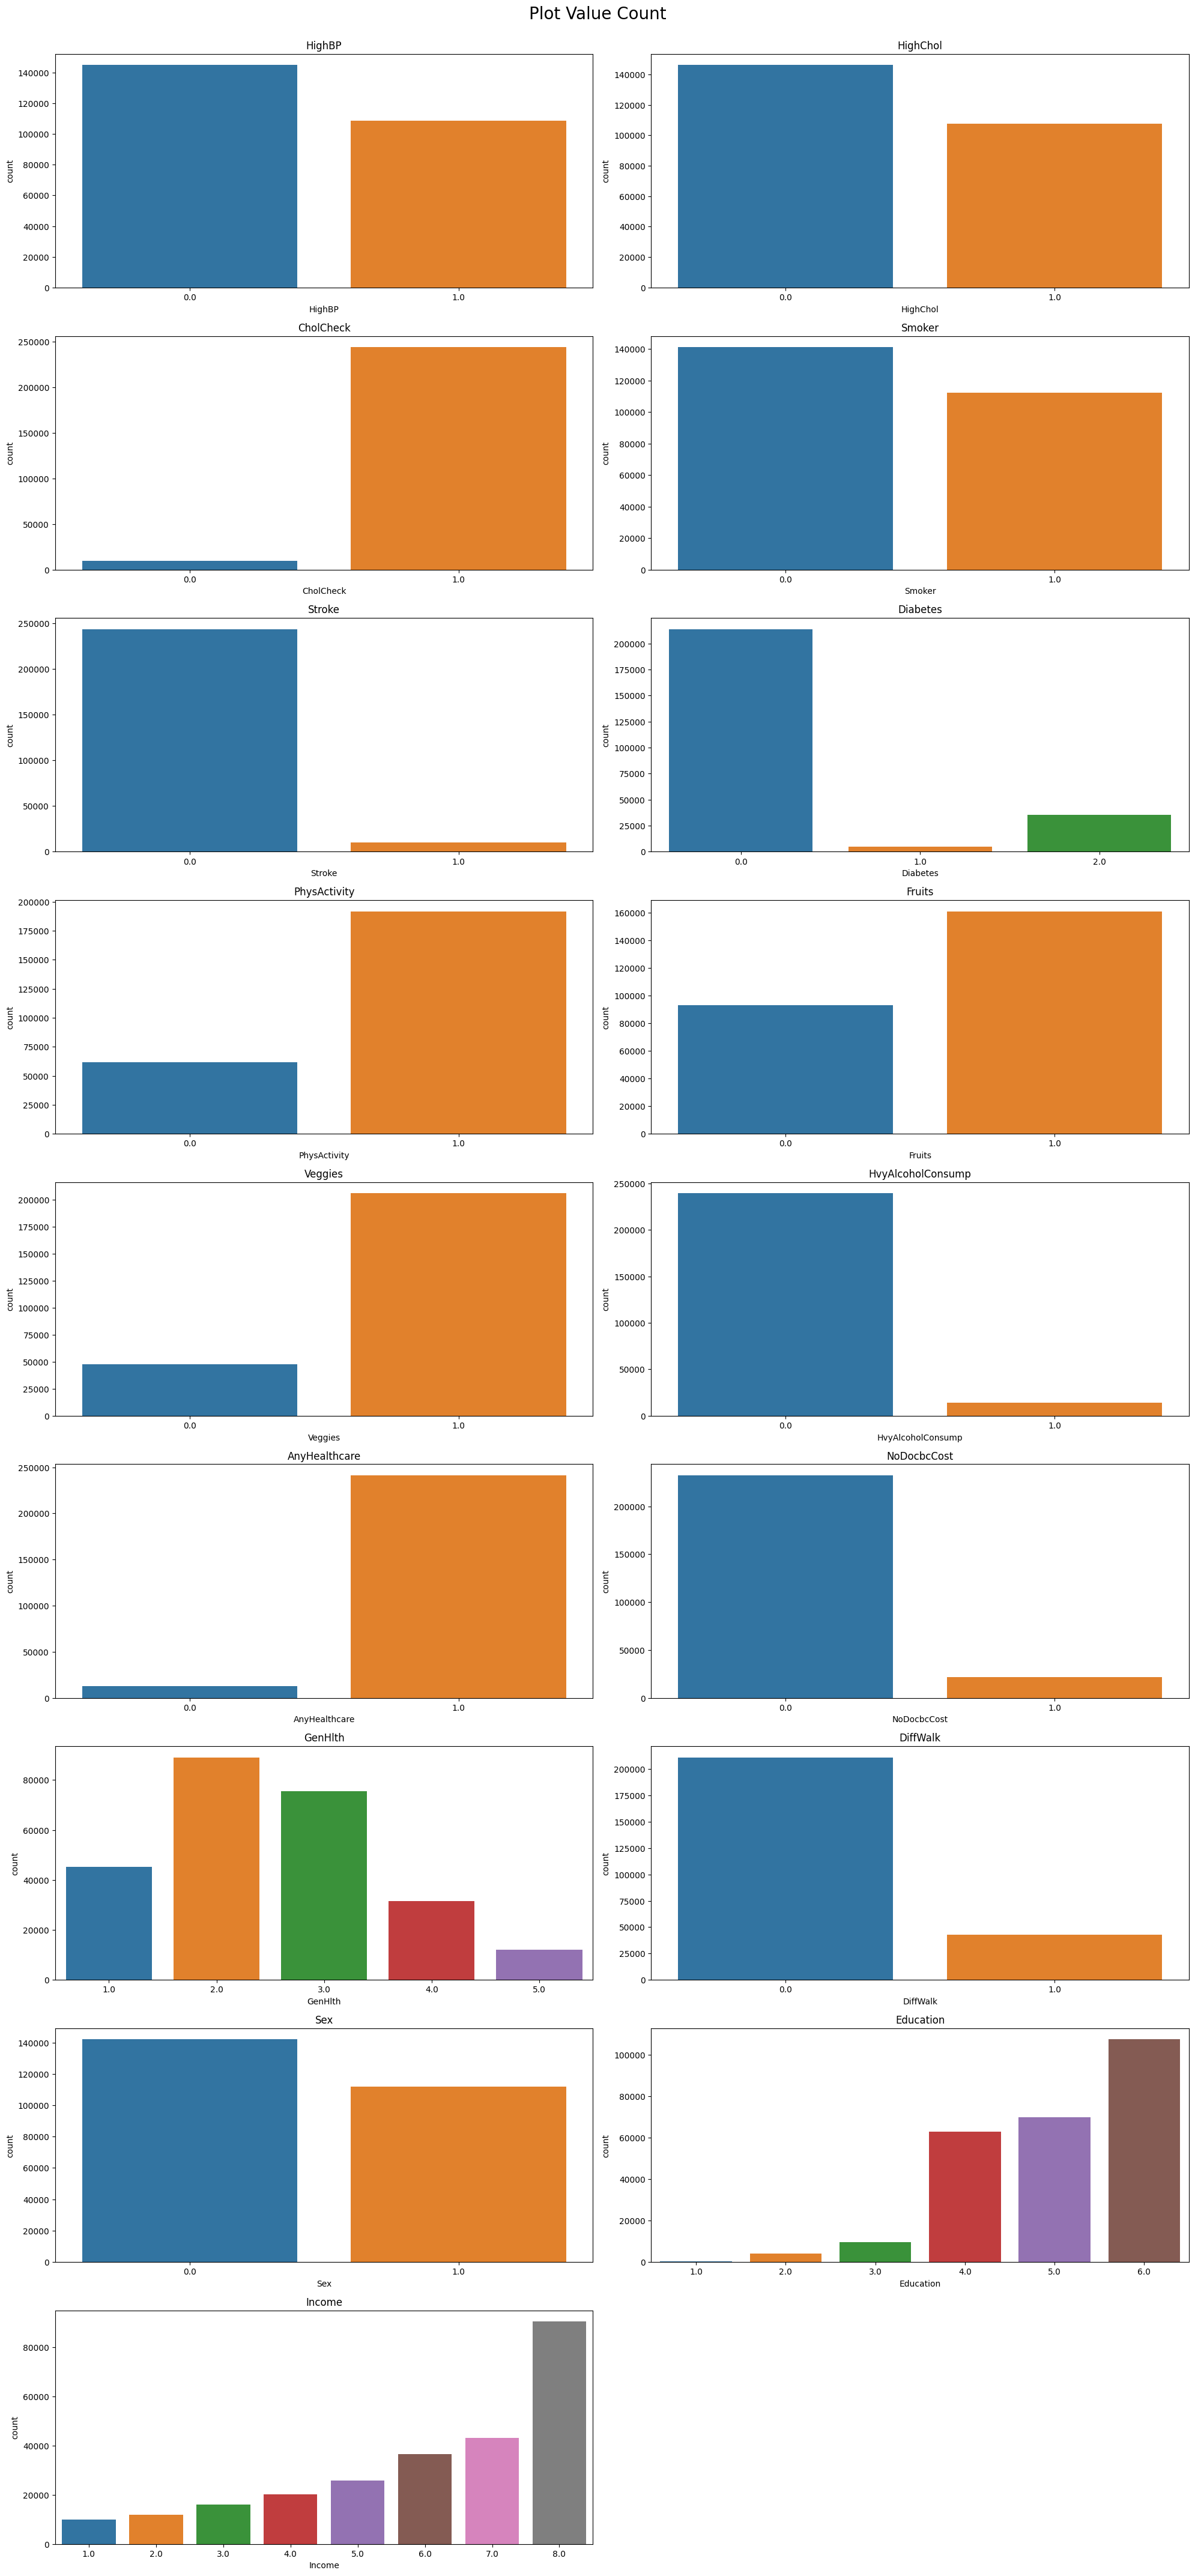

In [41]:
plt.figure(figsize=(20,80))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=ab, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

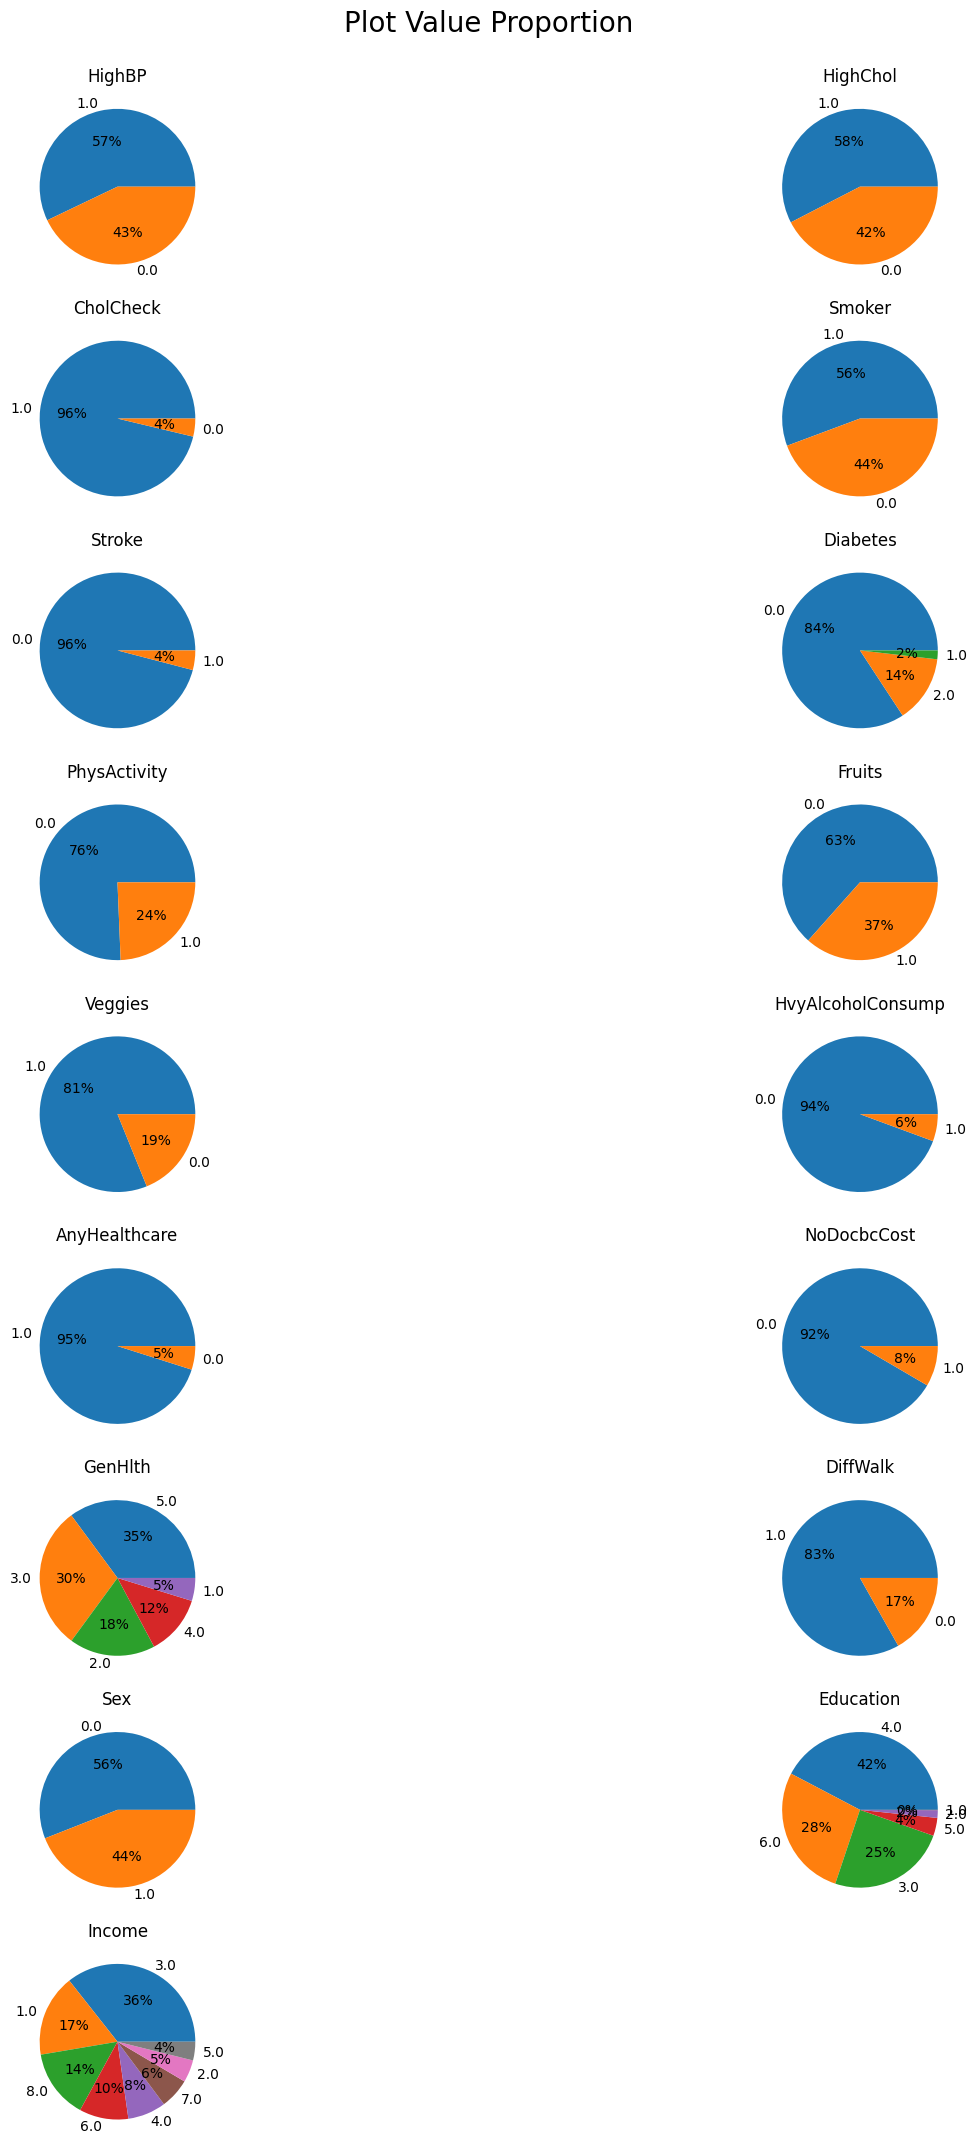

In [37]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=ab[column].value_counts(), labels=ab[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

In [48]:
cor_matrix = ab.corr().abs()
cor_matrix

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299   0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                      0.087299  0.125267  0.078046   0.004190   
Fruits                            0.019790  0.040555  0.040859   0.023849   
Veggies                           0.039167  0.061266  0.039874   0.006121   
HvyAlcoholConsump                 0.028991  0.003972  0.011543   0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   
NoDocbcCost                       0.031000  0.017358  0.013310   0.058255   
GenHlth                           0.258383  0.300530  0.208426   0.046589   
MentHlth                          0.064621  0.056456  0.062069   0.008366   
PhysHlth                          0.181698  0.161212  0.121751   0.031775   
DiffWalk                          0.212709  0.223618  0.144672   0.040585   
Sex                               0.086096  0.052207  0.031205   0.022115   
Age                               0.221618  0.344452  0.272318   0.090321   
Education                         0.099600  0.141358  0.070802   0.001510   
Income                            0.141011  0.171235  0.085459   0.014259   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272      0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596      0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085      0.078046   
CholCheck             0.034495  0.009929  0.024158  0.067546      0.004190   
BMI                   1.000000  0.013804  0.020153  0.224379      0.147294   
Smoker                0.013804  1.000000  0.061173  0.062914      0.087401   
Stroke                0.020153  0.061173  1.000000  0.107179      0.069151   
Diabetes              0.224379  0.062914  0.107179  1.000000      0.121947   
PhysActivity          0.147294  0.087401  0.069151  0.121947      1.000000   
Fruits                0.087518  0.077666  0.013389  0.042192      0.142756   
Veggies               0.062275  0.030678  0.041124  0.058972      0.153150   
HvyAlcoholConsump     0.048736  0.101619  0.016950  0.057882      0.012392   
AnyHealthcare         0.018471  0.023251  0.008776  0.015410      0.035505   
NoDocbcCost           0.058206  0.048946  0.034804  0.035436      0.061638   
GenHlth               0.239185  0.163143  0.177942  0.302587      0.266186   
MentHlth              0.085310  0.092196  0.070172  0.073507      0.125587   
PhysHlth              0.121141  0.116460  0.148944  0.176287      0.219230   
DiffWalk              0.197078  0.122463  0.176567  0.224239      0.253174   
Sex                   0.042950  0.093662  0.002978  0.031040      0.032482   
Age                   0.036618  0.120641  0.126974  0.185026      0.092511   
Education             0.103932  0.161955  0.076009  0.130517      0.199658   
Income                0.100069  0.123937  0.128599  0.171483      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack  0.019790  ...       0.018734     0.031000  0.258383   
HighBP                0.040555  ...       0.038425     0.017358  0.300530   
HighChol              0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626     0.058255  0.046589   
BMI                   0.087518  ...       0.018471     0.058206  0.239

In [49]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-49-691bc3f52c96>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack                   NaN  0.209361  0.180765   0.044206   
HighBP                                 NaN       NaN  0.298199   0.098508   
HighChol                               NaN       NaN       NaN   0.085642   
CholCheck                              NaN       NaN       NaN        NaN   
BMI                                    NaN       NaN       NaN        NaN   
Smoker                                 NaN       NaN       NaN        NaN   
Stroke                                 NaN       NaN       NaN        NaN   
Diabetes                               NaN       NaN       NaN        NaN   
PhysActivity                           NaN       NaN       NaN        NaN   
Fruits                                 NaN       NaN       NaN        NaN   
Veggies                                NaN       NaN       NaN        NaN   
HvyAlcoholConsump                      NaN       NaN       NaN        NaN   
AnyHealthcare                          NaN       NaN       NaN        NaN   
NoDocbcCost                            NaN       NaN       NaN        NaN   
GenHlth                                NaN       NaN       NaN        NaN   
MentHlth                               NaN       NaN       NaN        NaN   
PhysHlth                               NaN       NaN       NaN        NaN   
DiffWalk                               NaN       NaN       NaN        NaN   
Sex                                    NaN       NaN       NaN        NaN   
Age                                    NaN       NaN       NaN        NaN   
Education                              NaN       NaN       NaN        NaN   
Income                                 NaN       NaN       NaN        NaN   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272      0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596      0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085      0.078046   
CholCheck             0.034495  0.009929  0.024158  0.067546      0.004190   
BMI                        NaN  0.013804  0.020153  0.224379      0.147294   
Smoker                     NaN       NaN  0.061173  0.062914      0.087401   
Stroke                     NaN       NaN       NaN  0.107179      0.069151   
Diabetes                   NaN       NaN       NaN       NaN      0.121947   
PhysActivity               NaN       NaN       NaN       NaN           NaN   
Fruits                     NaN       NaN       NaN       NaN           NaN   
Veggies                    NaN       NaN       NaN       NaN           NaN   
HvyAlcoholConsump          NaN       NaN       NaN       NaN           NaN   
AnyHealthcare              NaN       NaN       NaN       NaN           NaN   
NoDocbcCost                NaN       NaN       NaN       NaN           NaN   
GenHlth                    NaN       NaN       NaN       NaN           NaN   
MentHlth                   NaN       NaN       NaN       NaN           NaN   
PhysHlth                   NaN       NaN       NaN       NaN           NaN   
DiffWalk                   NaN       NaN       NaN       NaN           NaN   
Sex                        NaN       NaN       NaN       NaN           NaN   
Age                        NaN       NaN       NaN       NaN           NaN   
Education                  NaN       NaN       NaN       NaN           NaN   
Income                     NaN       NaN       NaN       NaN           NaN   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack  0.019790  ...       0.018734     0.031000  0.258383   
HighBP                0.040555  ...       0.038425     0.017358  0.300530   
HighChol              0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626     0.058255  0.046589   
BMI                   0.087518  ...       0.018471     0.058206  0.239

In [50]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
to_drop

['Smoker',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education']

In [51]:
target = ab['HeartDiseaseorAttack']
features = ab.drop(to_drop, axis=1)
features = features.drop('HeartDiseaseorAttack',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HighBP     253680 non-null  float64
 1   HighChol   253680 non-null  float64
 2   CholCheck  253680 non-null  float64
 3   BMI        253680 non-null  float64
 4   Stroke     253680 non-null  float64
 5   Diabetes   253680 non-null  float64
 6   Fruits     253680 non-null  float64
 7   GenHlth    253680 non-null  float64
 8   Income     253680 non-null  float64
dtypes: float64(9)
memory usage: 17.4 MB


In [54]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,target,stratify=target, test_size=0.2)

In [56]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)
y_pred = Gnb.predict(X_test)
print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred))

Naive Bayes Classifier Accuracy:  0.8441540523494165


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Classifier Accuracy: ",accuracy_score(y_test, y_pred))

Random Forest Classifier Accuracy:  0.8950449385052034


In [59]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
print("XGBClassifier Accuracy: ",accuracy_score(y_test, y_pred))

XGBClassifier Accuracy:  0.9059247871333964
